## Proje-1 Göğüs Kanseri Sınıflandırması

### Kütüphanelerin yüklenmesi

In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Verileri Yükleyelim

In [2]:
# Veri setini aktaralım
veri = pd.read_csv("/DATA/datasets/breast-cancer.csv")
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Gereksiz Özellikleri Çıkaralım

In [3]:
# Gereksiz sütunları çıkar
veri.drop(["id"], inplace = True, axis = 1)

### Hastalık tanımı Kolon adını Değiştirelim

In [4]:
# verinin içindeki hastalık tanımı kolon adını değiştir.
veri = veri.rename(columns = {"diagnosis" : "hedef"})
veri.head()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Hastalık Dağılımını görselleştirelim.

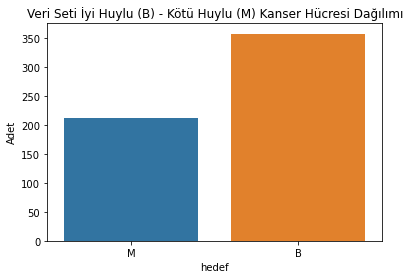

B    357
M    212
Name: hedef, dtype: int64


In [5]:
# veriyi görselleştirelim
plt.figure()
sns.countplot(veri["hedef"])
plt.ylabel("Adet")
plt.title("Veri Seti İyi Huylu (B) - Kötü Huylu (M) Kanser Hücresi Dağılımı")
plt.show()
print(veri.hedef.value_counts())

### B ve M değerlerinin 0 ve 1 olarak değiştirilmesi

In [6]:
# B ve M nin 0 ve 1 olarak değiştirilmesi
veri["hedef"] = [1 if i.strip() == "M" else 0 for i in veri.hedef]
veri.head(3)

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### Verinin Uzunluğu

In [7]:
# Verinin uzunluğu
print("Verini Uzunluğu : ", len(veri))

Verini Uzunluğu :  569


### Verinin Şekli

In [9]:
# Verinin şekli
print("Verinin Şekli : ", veri.shape)

Verinin Şekli :  (569, 31)


### Verinin Özellikleri

In [8]:
# Verinin Özellikleri
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hedef                    569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Verinin Temel İstatistiksel Özellikleri

In [9]:
# Verinin temel istatistiksel özellikleri
veri.describe()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Değerler Arası İlişkilere Bakalım

<Figure size 864x576 with 0 Axes>

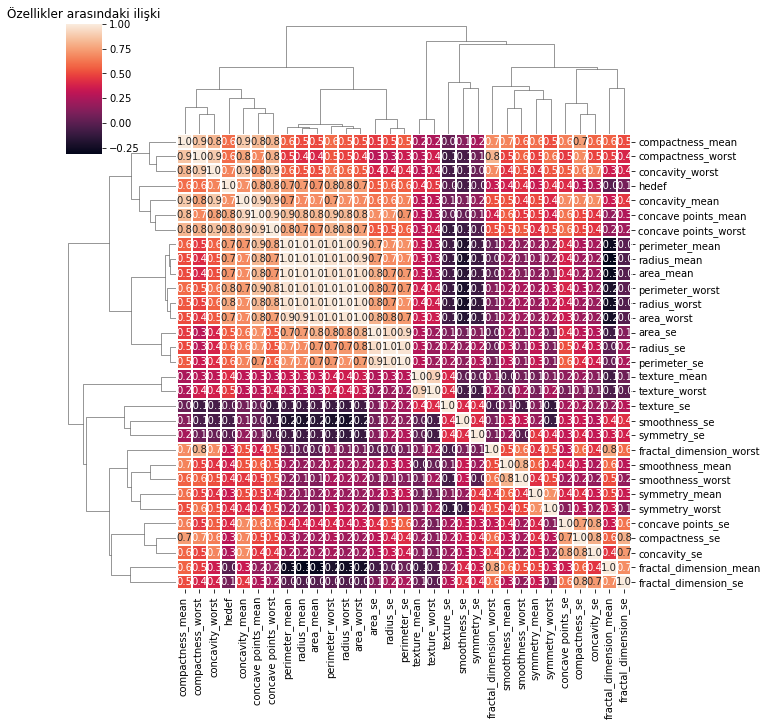

In [10]:
# Verinin içindeki değerler arası ilişkilere bakalım.
corr_matrix = veri.corr()
plt.figure(figsize = (12, 8))
sns.clustermap(corr_matrix, annot = True, fmt = ".1f", linewidths = 0.01)
plt.title("Özellikler arasındaki ilişki")
plt.show()

### Korelasyonu 0.75 in üzerinde olanlar

<Figure size 432x288 with 0 Axes>

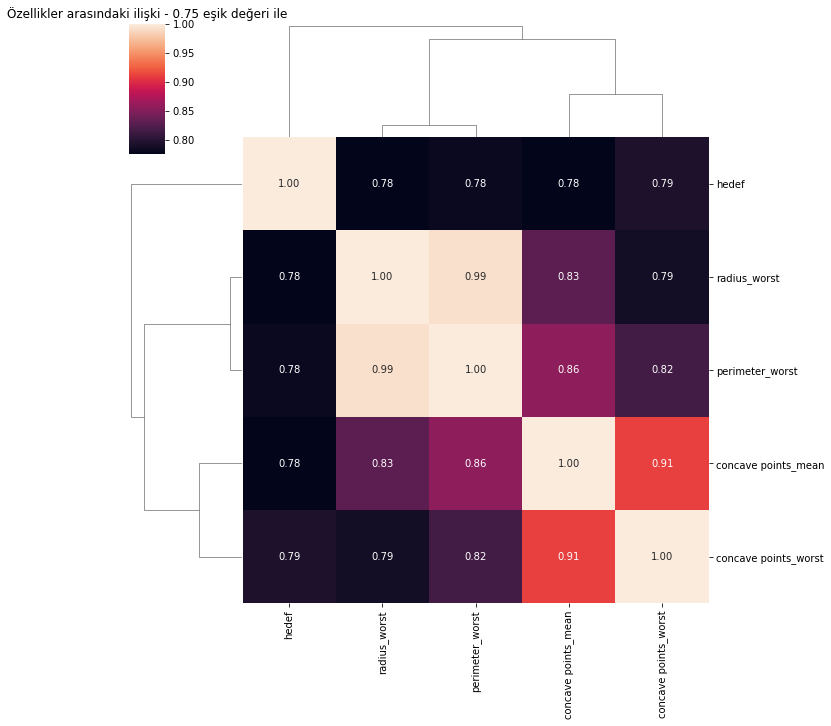

In [11]:
# Hedef ile arasındaki ilişkiler artı/eksi 0.75 den büyük olanlar.
thereshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > thereshold
corr_features = corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Özellikler arasındaki ilişki - 0.75 eşik değeri ile")
plt.show()

### Hedef ile ilişkili özelliklerin saçılımları

<Figure size 432x288 with 0 Axes>

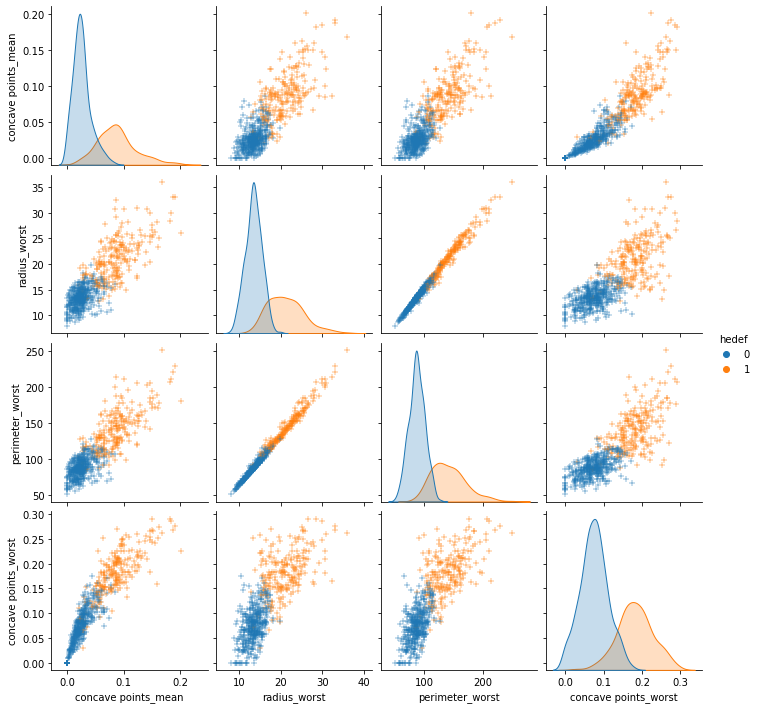

In [12]:
# Hedef ile ilişkili  özelliklerin saçılımları
plt.figure()
sns.pairplot(veri[corr_features], diag_kind = "kde", markers = "+", hue = "hedef")
plt.show()

### Aykırı Değerleri Bulalım

#### Veriyi x ve y olarak ikiye bölelim

In [13]:
# veriyi x ve y olarak ikiye bölelim
y = veri.hedef
x = veri.drop(["hedef"], axis = 1)
columns = x.columns.tolist()

#### Yerel Aykırı Faktör Algoritması (Local Outlier Factor)

In [15]:
# yerel aykırı değer faktöre yöntemi
clf = LocalOutlierFactor()
# yerel aykırı faktör yöntemi
y_pred = clf.fit_predict(x)
# skora bakalım
X_score = clf.negative_outlier_factor_


#### Skoru bir Data Frame şekline çevirelim

In [16]:
# skoru bir veri çerçevesi yapıp içerisine ekleyelim.
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

#### Belli bir eşik değerine göre aykırı değer bulalım

In [17]:
# belirli bir eşik değerine göre aykırı değerleri bulalım
thereshold = -2.2
filtre = outlier_score["score"] < thereshold
outlier_index = outlier_score[filtre].index.tolist()

#### Aykırı değerleri görselleştirelim

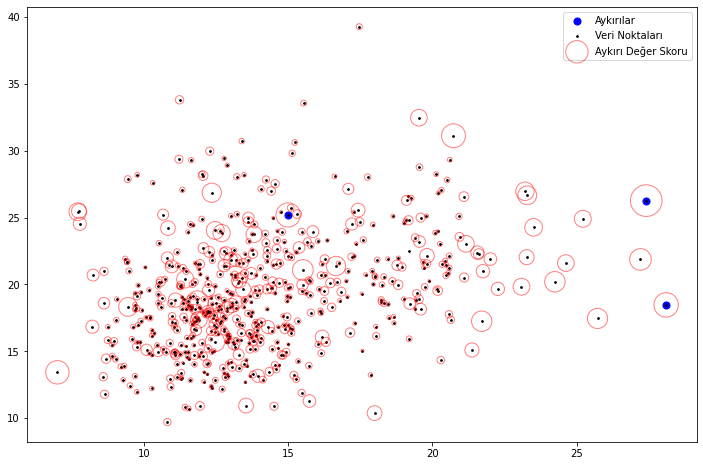

In [18]:
# yerel aykırı faktör yöntemi ile belirlenen aykırı değeri çıkaralım.
plt.figure(figsize = (12, 8))
plt.scatter(x.iloc[outlier_index, 0], x.iloc[outlier_index, 1], 
    color = "blue", s = 50, label = "Aykırılar")
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = "k", 
    s = 3, label = "Veri Noktaları")
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = "r", 
    alpha = 0.5, facecolors = "none", label = "Aykırı Değer Skoru")
plt.legend()
plt.show()

#### Aykırı değerleri atalım

In [19]:
# Aykırı değerleri çıkaralım
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

### Eğitim ve Test Bölünmesi

In [20]:
# eğitim ve test bölünmesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(x, y, 
    test_size = 0.3, random_state = 42)

### Normalizasyon - Z Score

In [21]:
# standardizasyon
scaler = StandardScaler()
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

### Görselleştirme için Data Fram oluşturulması

In [22]:
# Görselleştirem için data frame oluşturalım
X_egitim_df = pd.DataFrame(X_egitim, columns = columns)
X_egitim_df_describe = X_egitim_df.describe()
X_egitim_df["hedef"] = Y_egitim

### Kutu grafiği çizelim

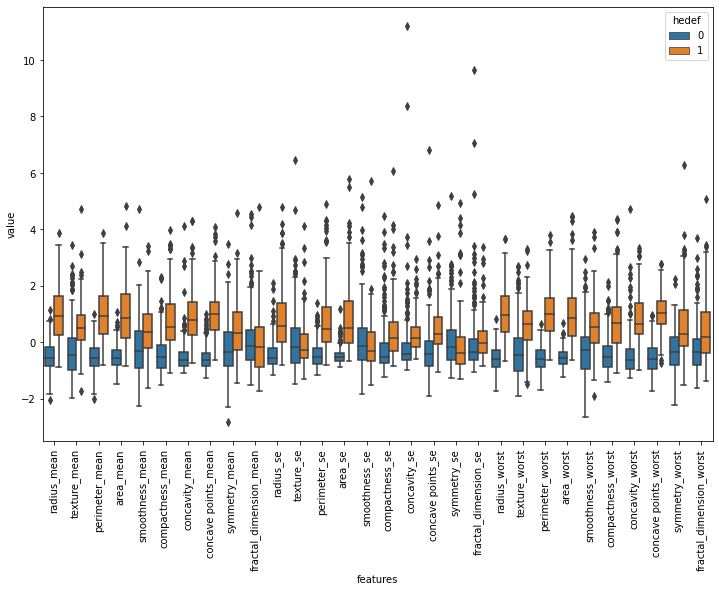

In [23]:
# kutu grafiği
data_melted = pd.melt(X_egitim_df, id_vars = "hedef",
    var_name = "features", value_name = "value")
plt.figure(figsize = (12, 8))
sns.boxplot(x = "features", y = "value", hue = "hedef", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

### KNN Sınıflandırması yapalım

In [24]:
# k en yakın komşu sınıflandırması
# model
knn = KNeighborsClassifier(n_neighbors = 2)
# eğitim
knn.fit(X_egitim, Y_egitim)

KNeighborsClassifier(n_neighbors=2)

### Tahminleyelim

In [25]:
# tahmin
y_pred = knn.predict(X_test)

### Confusion Matrix ve Görselleştirelim

Karışıklık Matrisi :  [[102   0]
 [ 11  57]]


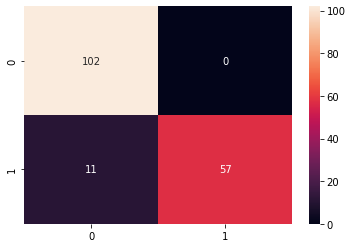

In [26]:
# Karışıklık Matrisi
cm = confusion_matrix(Y_test, y_pred)
print("Karışıklık Matrisi : ", cm)
plt.figure()
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.show()

### Doğruluk Oranı

In [27]:
# doğruluk
dogruluk = accuracy_score(Y_test, y_pred)
print("Doğruluk : ", dogruluk)

Doğruluk :  0.9352941176470588


### En iyi k değeri

In [28]:
# en iyi k değeri
def eniyiParametreler(x_egitim, x_test, y_egitim, y_test):
    # en iyi k değeri
    k_range = list(range(1, 31))
    # uniform : tek tip ağırlıklar, tüm noktalar eşit ağırlıklı
    # distance : mesafelerin tersien göre ağırlıklar.
    weight_options = ["uniform", "distance"] # farklı knn parametreleri
    # ızgara araması için parametreleri dictionary içine ekleyelim.
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    # knn sınıflandırıcı
    knn = KNeighborsClassifier()
    # çapraz doğrulama ile izgara arama
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    # eğitim
    grid.fit(x_egitim, y_egitim)
    # en iyi sonucu veren parametrelerin gösterimi
    print("En iyi eğitim skoru : {} ve parametreler : {}".
        format(grid.best_score_, grid.best_params_))
    print()
    # en iyi sonucu veren parametreler ile yeni bir k en yakın komşu modeli
    knn = KNeighborsClassifier(**grid.best_params_)
    # eğitim
    knn.fit(x_egitim, y_egitim)
    # tahminleme
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_egitim)
    # karışıklık matrisi
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_egitim, y_pred_train)
    # doğruluk sonuçlarının yazdırılması
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_egitim, y_pred_train)
    print("Test Doğruluğu : {}, Eğitim Doğruluğu : {}".
        format(acc_test, acc_train))
    print()
    print("Karışıklık Matrisi Test : ")
    print(cm_test)
    print("Karışıklık Matrisi Eğitim : ")
    print(cm_train)
    return grid

### En iyi k değeri ile oluşturulan model

In [29]:
# en iyi k değeri ile oluşturulan model
grid = eniyiParametreler(X_egitim, X_test, Y_egitim, Y_test)

En iyi eğitim skoru : 0.972051282051282 ve parametreler : {'n_neighbors': 4, 'weights': 'distance'}

Test Doğruluğu : 0.9470588235294117, Eğitim Doğruluğu : 1.0

Karışıklık Matrisi Test : 
[[100   2]
 [  7  61]]
Karışıklık Matrisi Eğitim : 
[[255   0]
 [  0 141]]


### Temel Bileşenler Analizi

#### Standardizasyom

In [30]:
# standardizasyon
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Tanımla

In [31]:
# temel bileşeni tanımla
pca = PCA(n_components = 2)

#### Eğitim

In [32]:
# pca eğit
pca.fit(x_scaled)

PCA(n_components=2)

#### PCA Uygula

In [34]:
# pca uygula
X_reduced_pca = pca.transform(x_scaled)

#### Görselleştir

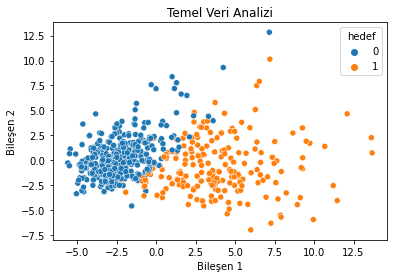

In [35]:
# görselleştirelim.
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1", "p2"])
pca_data["hedef"] = y
plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = pca_data)
plt.title("Temel Veri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

#### PCA sonucu elde edilen veriyi test ve train bölelim

In [36]:
# pca verinin test ve eğitim bölünmesi
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, 
    test_size = 0.3, random_state = 42)

##### En iyi KNN değerleri

In [37]:
# pca sonucu elde edilen veri için en iyi knn değerleri
grid_pca = eniyiParametreler(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

En iyi eğitim skoru : 0.9518589743589743 ve parametreler : {'n_neighbors': 7, 'weights': 'uniform'}

Test Doğruluğu : 0.9294117647058824, Eğitim Doğruluğu : 0.9545454545454546

Karışıklık Matrisi Test : 
[[97  5]
 [ 7 61]]
Karışıklık Matrisi Eğitim : 
[[247   8]
 [ 10 131]]


#### PCA sonuçlarını tahminleyip, görselleştirelim

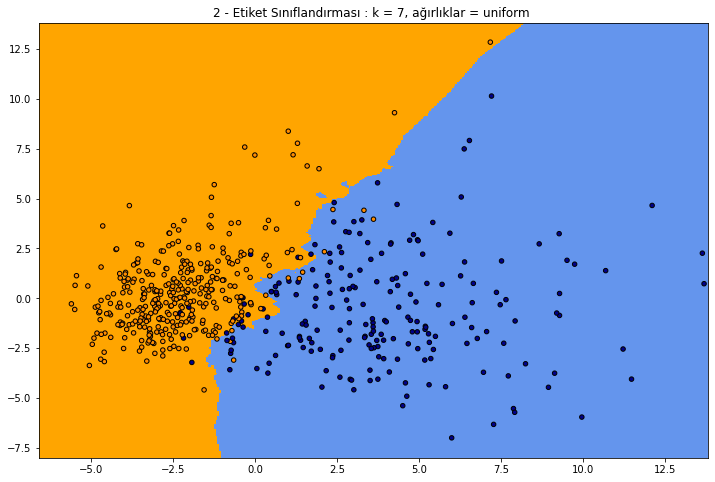

In [39]:
# pca sonucu elde edilen veriyi tahminleyip, görselleştirelim
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "darkblue"])
h = 0.05
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, y_max, h), 
    np.arange(y_min, y_max, h))
Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12, 8))
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
# eğitimde kullanılan her bir noktayı görselleştirelim.
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold,
    edgecolor = "k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("{} - Etiket Sınıflandırması : k = {}, ağırlıklar = {} ".
    format(2, grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()

### Komşuluk bileşenleri analizi, eğitimi ve uygulanması

In [40]:
# iki bileşenli komşuluk bileşeni olsun.
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)

In [41]:
# komşuluk eğitimi
nca.fit(x_scaled, y)

NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [42]:
# komşuluk uygula
X_reduced_nca = nca.transform(x_scaled)

### Komşuluk Görselleştirilmesi

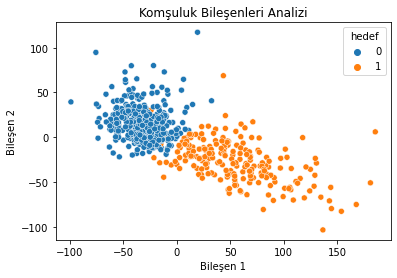

In [43]:
# komşuluk yorumu için dataframe alalım.
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1", "p2"])
nca_data["hedef"] = y
plt.figure()
sns.scatterplot(x = "p1", y = "p2", hue = "hedef", data = nca_data)
plt.title("Komşuluk Bileşenleri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

### NCA sonucundaki veriyi test ve train olarak bölelim

In [44]:
# nca sonucu elde edilen veriyi bölellim.
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, 
    y, test_size = 0.3, random_state = 42)

### NCA için en iyi KNN bulalım

In [45]:
# nca sonucu elde edilen veri için en iyi knn bulunması
grid_nca = eniyiParametreler(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

En iyi eğitim skoru : 0.9923717948717948 ve parametreler : {'n_neighbors': 1, 'weights': 'uniform'}

Test Doğruluğu : 0.9764705882352941, Eğitim Doğruluğu : 1.0

Karışıklık Matrisi Test : 
[[101   1]
 [  3  65]]
Karışıklık Matrisi Eğitim : 
[[255   0]
 [  0 141]]


### NCA sonucunu tahminleyip, görselleştirelim

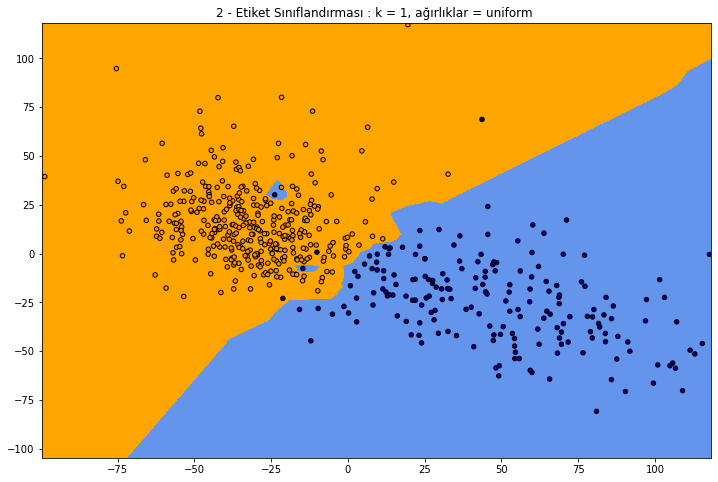

In [47]:
# nca sonucu elde edilen veriyi tahminleyip, görselleştirelim
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "darkblue"])
h = 0.2
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, y_max, h), 
                     np.arange(y_min, y_max, h))
Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12, 8))
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
# eğitimde kullanılan her bir noktayı görselleştirelim.
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold,
    edgecolor = "k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("{} - Etiket Sınıflandırması : k = {}, ağırlıklar = {} ".
    format(2, grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))
plt.show()